In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_data_complete = pd.merge(clinical_data, mouse_drug_data, 
                                  how = "left", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
clinical_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vols_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_vols_mean = pd.DataFrame(tumor_vols_mean)

tumor_vols_mean = tumor_vols_mean.reset_index()
# Preview DataFrame
tumor_vols_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vols_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_vols_sem = pd.DataFrame(tumor_vols_sem)

# tumor_vols_sem


# Preview DataFrame
tumor_vols_sem.head().reset_index()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_vols_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


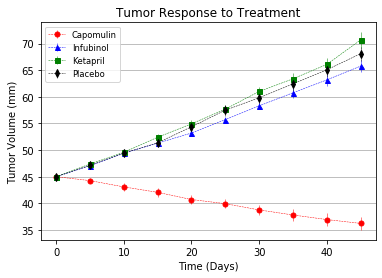

In [8]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], 
             yerr = tumor_vols_pivot_sem["Capomulin"], color = "r", marker = "o", 
             markersize = 5, linestyle = "dashed", linewidth = 0.50)
        
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Infubinol"], 
             yerr = tumor_vols_pivot_sem["Infubinol"], color = "b", marker = "^", 
             markersize = 5, linestyle = "dashed", linewidth = 0.50)

plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ketapril"], 
             yerr = tumor_vols_pivot_sem["Ketapril"], color = "g", marker = "s", 
             markersize = 5, linestyle = "dashed", linewidth = 0.50)

plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Placebo"], 
             yerr = tumor_vols_pivot_sem["Placebo"], color = "k", marker = "d", 
             markersize = 5, linestyle = "dashed", linewidth = 0.50)

# # Save the Figure
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm)")
plt.xlabel("Time (Days)")
plt.grid(axis = 'y')
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], 
           loc = "best", fontsize = "small", fancybox = True)

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
met_sites_mean = pd.DataFrame(met_sites_mean)
# Preview DataFrame
met_sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
met_sites_sem = pd.DataFrame(met_sites_sem)
# Preview DataFrame
met_sites_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
met_sites_mean = met_sites_mean.reset_index()
met_sites_pivot_mean = met_sites_mean.pivot(index = "Timepoint", columns = "Drug")["Metastatic Sites"]

met_sites_sem = met_sites_sem.reset_index()

met_sites_pivot_sem = met_sites_sem.pivot(index = "Timepoint", columns = "Drug")["Metastatic Sites"]

# Preview that Reformatting worked
met_sites_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


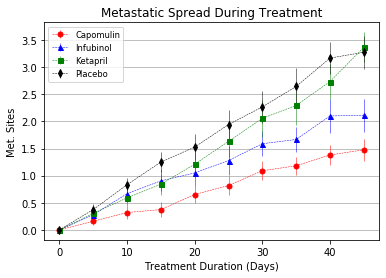

In [12]:
# Generate the Plot (with Error Bars)

plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Capomulin"], 
             yerr = met_sites_pivot_sem["Capomulin"], color = "r", marker = "o", 
             markersize = 5, linestyle = "dashed", linewidth = 0.50)
        
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Infubinol"], 
             yerr = met_sites_pivot_sem["Infubinol"], color = "b", marker = "^", 
             markersize = 5, linestyle = "dashed", linewidth = 0.50)

plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Ketapril"], 
             yerr = met_sites_pivot_sem["Ketapril"], color = "g", marker = "s", 
             markersize = 5, linestyle = "dashed", linewidth = 0.50)

plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Placebo"], 
             yerr = met_sites_pivot_sem["Placebo"], color = "k", marker = "d", 
             markersize = 5, linestyle = "dashed", linewidth = 0.50)

# Save the Figure

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis = 'y')
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], 
           loc = "best", fontsize = "small", fancybox = True)


# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = clinical_data_complete.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})
# Preview DataFrame
survival_count.head().reset_index()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index = "Timepoint", columns = "Drug")["Mouse Count"]
# Preview the Data Frame
survival_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


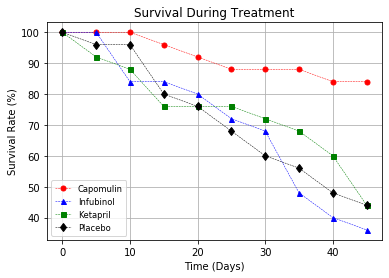

In [15]:
# Generate the Plot (Accounting for percentages)
plt.plot(100*survival_count_pivot["Capomulin"]/25, "ro", linestyle = "dashed", markersize = 5,
        linewidth = 0.50)

plt.plot(100*survival_count_pivot["Infubinol"]/25, "b^", linestyle = "dashed", markersize = 5,
        linewidth = 0.50)

plt.plot(100*survival_count_pivot["Ketapril"]/25, "gs", linestyle = "dashed", markersize = 5,
        linewidth = 0.50)

plt.plot(100*survival_count_pivot["Placebo"]/25, "kd", linestyle = "dashed", markersize = 6,
        linewidth = 0.50)

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)

# Save the Figure
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], 
           loc = "best", fontsize = "small", fancybox = True)

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
tumor_pct_change = 100* (tumor_vols_pivot_mean.iloc[-1] - tumor_vols_pivot_mean.iloc[0])/tumor_vols_pivot_mean.iloc[0]
tumor_pct_change_sem = 100* (tumor_vols_pivot_sem.iloc[-1] - tumor_vols_sem.iloc[0])
# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

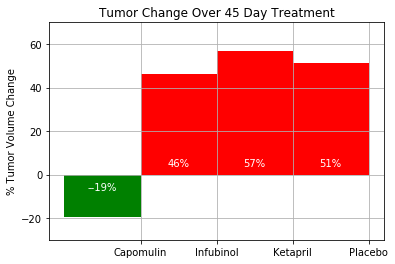

In [19]:
# Store all Relevant Percent Changes into a Tuple
pct_change = (tumor_pct_change["Capomulin"],
              tumor_pct_change["Infubinol"],
              tumor_pct_change["Ketapril"],
              tumor_pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_change))
width = 1
rectsPass= ax.bar(ind[0], pct_change[0], width, color = "green")
rectsFail = ax.bar(ind[1:], pct_change[1:], width, color = "red")

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.set_autoscaley_on(False)
ax.set_ylim([-30, 70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2. , 3, "%d%%" % int(height), 
                ha = "center", va = "bottom", color = "white")

# Call functions to implement the function calls
def autolabelPass(rects):
    for rect in rects: 
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8, "-%d%%" % int(height), 
                ha = "center", va = "bottom", color = "white")
        
# # Save the Figure
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)